In [2]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
file_path = os.path.join("..", "data", "processed", "output.csv")
technologies_df = pd.read_csv(file_path,  encoding="utf-8")
technologies_df.replace("[ ]", np.nan, inplace=True)
technologies_df

,date,title,company,location,salary,experience,link,technologies
0,14 травня 2025,Odoo Python Developer,Netframe,"Київ, віддалено",від $800,NaN,https://jobs.dou.ua/companies/netframe/vacanci...,"{""technologies"": [""css"", ""git"", ""grpc"", ""html""..."
1,19 травня 2025,Senior Python Engineer [Data oriented],YozmaTech,віддалено,NaN,5.0,https://jobs.dou.ua/companies/yozma-tech/vacan...,"{""technologies"": [""aws"", ""django"", ""mongodb"", ..."
2,30 травня 2025,Middle/Senior Python Developer (Poland) (Jiji),Genesis,"Варшава (Польща), віддалено",NaN,3.0,https://jobs.dou.ua/companies/genesis-technolo...,"{""technologies"": [""aws"", ""flask"", ""jenkins"", ""..."
3,29 травня 2025,Python Team Lead,Infingame,за кордоном,NaN,1.0,https://jobs.dou.ua/companies/infingame/vacanc...,"{""technologies"": [""aws"", ""celery"", ""docker"", ""..."
4,20 травня 2025,Middle Python AI Engineer,WLTech.AI (WebLab Technology),віддалено,до $4000,1.0,https://jobs.dou.ua/companies/weblab-technolog...,"{""technologies"": [""aws"", ""fastapi"", ""flask"", ""..."
...,...,...,...,...,...,...,...,...
265,Вакансія від 3 червня 2025,Automation Engineer (Python),Zultys Inc.,Дистанційна робота,$1400-1600,2.0,https://www.work.ua/jobs/3671922/,"{""technologies"": [""git"", ""pytest"", ""python"", ""..."
266,Вакансія від 24 травня 2025,Python developer,SalesBrush,Дистанційна робота,$300-400,1.0,https://www.work.ua/jobs/5664829/,"{""technologies"": [""flask"", ""javascript"", ""post..."
267,Вакансія від 14 травня 2025,"Trainee/Junior Python, Java Direct IT, Web Dev...","Бойко Л.М., ФОП",Київ,$706,NaN,https://www.work.ua/jobs/6640072/,"{""technologies"": [""django"", ""flask"", ""python""]..."
268,Вакансія від 27 травня 2025,Python-програміст (middle),Система-М,Дистанційна робота,$1400-2350,2.0,https://www.work.ua/jobs/5712801/,"{""technologies"": [""aws"", ""git"", ""mongodb"", ""py..."


In [5]:
technologies_df.head(10)

,date,title,company,location,salary,experience,link,technologies
0,14 травня 2025,Odoo Python Developer,Netframe,"Київ, віддалено",від $800,NaN,https://jobs.dou.ua/companies/netframe/vacanci...,"{""technologies"": [""css"", ""git"", ""grpc"", ""html""..."
1,19 травня 2025,Senior Python Engineer [Data oriented],YozmaTech,віддалено,NaN,5.0,https://jobs.dou.ua/companies/yozma-tech/vacan...,"{""technologies"": [""aws"", ""django"", ""mongodb"", ..."
2,30 травня 2025,Middle/Senior Python Developer (Poland) (Jiji),Genesis,"Варшава (Польща), віддалено",NaN,3.0,https://jobs.dou.ua/companies/genesis-technolo...,"{""technologies"": [""aws"", ""flask"", ""jenkins"", ""..."
3,29 травня 2025,Python Team Lead,Infingame,за кордоном,NaN,1.0,https://jobs.dou.ua/companies/infingame/vacanc...,"{""technologies"": [""aws"", ""celery"", ""docker"", ""..."
4,20 травня 2025,Middle Python AI Engineer,WLTech.AI (WebLab Technology),віддалено,до $4000,1.0,https://jobs.dou.ua/companies/weblab-technolog...,"{""technologies"": [""aws"", ""fastapi"", ""flask"", ""..."
5,19 травня 2025,Senior Python Developer (AI/LLM experience),CLUST,віддалено,NaN,NaN,https://jobs.dou.ua/companies/clust/vacancies/...,"{""technologies"": [""aws"", ""machine_learning"", ""..."
6,14 травня 2025,Senior Back-end_Python Engineer,Softermii,віддалено,до $5500,5.0,https://jobs.dou.ua/companies/softermii/vacanc...,"{""technologies"": [""aws"", ""docker"", ""git"", ""jen..."
7,13 травня 2025,Senior Back-End Developer,Wildy AI,віддалено,$2800–3500,NaN,https://jobs.dou.ua/companies/wildy-ai/vacanci...,"{""technologies"": [""python""], ""soft_skills"": []}"
8,18 травня 2025,Senior Backend Engineer (Python),Newxel,"Київ, Варшава (Польща), віддалено",NaN,NaN,https://jobs.dou.ua/companies/newxel/vacancies...,"{""technologies"": [""aws"", ""docker"", ""kafka"", ""k..."
9,21 травня 2025,Python Back-End Developer,Uvik Software,"Чернівці, Івано-Франківськ, за кордоном, відда...",NaN,4.0,https://jobs.dou.ua/companies/uvik-software/va...,"{""technologies"": [""django"", ""fastapi"", ""flask""..."


Converting a dictionary string to a real dict

In [7]:
technologies_df["pars_tags"] = technologies_df["technologies"].apply(lambda x: json.loads(x) if isinstance(x, str) else {"technologies" : [], "soft_skills": []})
technologies_df["pars_tags"]

0      {'technologies': ['css', 'git', 'grpc', 'html'...
1      {'technologies': ['aws', 'django', 'mongodb', ...
2      {'technologies': ['aws', 'flask', 'jenkins', '...
3      {'technologies': ['aws', 'celery', 'docker', '...
4      {'technologies': ['aws', 'fastapi', 'flask', '...
                             ...                        
265    {'technologies': ['git', 'pytest', 'python', '...
266    {'technologies': ['flask', 'javascript', 'post...
267    {'technologies': ['django', 'flask', 'python']...
268    {'technologies': ['aws', 'git', 'mongodb', 'py...
269    {'technologies': ['beautiful_soup', 'fastapi',...
Name: pars_tags, Length: 270, dtype: object

In [8]:
technologies_df["tech_only"] = technologies_df["pars_tags"].apply(lambda x: x["technologies"])
technologies_df["soft_only"] = technologies_df["pars_tags"].apply(lambda x: x["soft_skills"])

technologies_df.head(10)

,date,title,company,location,salary,experience,link,technologies,pars_tags,tech_only,soft_only
0,14 травня 2025,Odoo Python Developer,Netframe,"Київ, віддалено",від $800,NaN,https://jobs.dou.ua/companies/netframe/vacanci...,"{""technologies"": [""css"", ""git"", ""grpc"", ""html""...","{'technologies': ['css', 'git', 'grpc', 'html'...","[css, git, grpc, html, javascript, jenkins, po...",[]
1,19 травня 2025,Senior Python Engineer [Data oriented],YozmaTech,віддалено,NaN,5.0,https://jobs.dou.ua/companies/yozma-tech/vacan...,"{""technologies"": [""aws"", ""django"", ""mongodb"", ...","{'technologies': ['aws', 'django', 'mongodb', ...","[aws, django, mongodb, postgresql, python, sql]","[adaptability, communication, creativity, lear..."
2,30 травня 2025,Middle/Senior Python Developer (Poland) (Jiji),Genesis,"Варшава (Польща), віддалено",NaN,3.0,https://jobs.dou.ua/companies/genesis-technolo...,"{""technologies"": [""aws"", ""flask"", ""jenkins"", ""...","{'technologies': ['aws', 'flask', 'jenkins', '...","[aws, flask, jenkins, kafka, machine_learning,...","[learning, reliability]"
3,29 травня 2025,Python Team Lead,Infingame,за кордоном,NaN,1.0,https://jobs.dou.ua/companies/infingame/vacanc...,"{""technologies"": [""aws"", ""celery"", ""docker"", ""...","{'technologies': ['aws', 'celery', 'docker', '...","[aws, celery, docker, fastapi, jenkins, kubern...","[communication, creativity, leadership, learning]"
4,20 травня 2025,Middle Python AI Engineer,WLTech.AI (WebLab Technology),віддалено,до $4000,1.0,https://jobs.dou.ua/companies/weblab-technolog...,"{""technologies"": [""aws"", ""fastapi"", ""flask"", ""...","{'technologies': ['aws', 'fastapi', 'flask', '...","[aws, fastapi, flask, graphql, javascript, lar...","[creativity, learning, organization, reliability]"
5,19 травня 2025,Senior Python Developer (AI/LLM experience),CLUST,віддалено,NaN,NaN,https://jobs.dou.ua/companies/clust/vacancies/...,"{""technologies"": [""aws"", ""machine_learning"", ""...","{'technologies': ['aws', 'machine_learning', '...","[aws, machine_learning, postgresql, python, sql]",[]
6,14 травня 2025,Senior Back-end_Python Engineer,Softermii,віддалено,до $5500,5.0,https://jobs.dou.ua/companies/softermii/vacanc...,"{""technologies"": [""aws"", ""docker"", ""git"", ""jen...","{'technologies': ['aws', 'docker', 'git', 'jen...","[aws, docker, git, jenkins, kafka, kubernetes,...","[responsibility, teaching, teamwork]"
7,13 травня 2025,Senior Back-End Developer,Wildy AI,віддалено,$2800–3500,NaN,https://jobs.dou.ua/companies/wildy-ai/vacanci...,"{""technologies"": [""python""], ""soft_skills"": []}","{'technologies': ['python'], 'soft_skills': []}",[python],[]
8,18 травня 2025,Senior Backend Engineer (Python),Newxel,"Київ, Варшава (Польща), віддалено",NaN,NaN,https://jobs.dou.ua/companies/newxel/vacancies...,"{""technologies"": [""aws"", ""docker"", ""kafka"", ""k...","{'technologies': ['aws', 'docker', 'kafka', 'k...","[aws, docker, kafka, kubernetes, machine_learn...","[communication, creativity, learning, self_mot..."
9,21 травня 2025,Python Back-End Developer,Uvik Software,"Чернівці, Івано-Франківськ, за кордоном, відда...",NaN,4.0,https://jobs.dou.ua/companies/uvik-software/va...,"{""technologies"": [""django"", ""fastapi"", ""flask""...","{'technologies': ['django', 'fastapi', 'flask'...","[django, fastapi, flask, graphql, postgresql, ...","[creativity, teamwork]"


In [21]:
technologies_df.head(10)

,date,title,company,location,salary,experience,link,pars_tags,tech_only,soft_only
0,14 травня 2025,Odoo Python Developer,Netframe,"Київ, віддалено",від $800,NaN,https://jobs.dou.ua/companies/netframe/vacanci...,"{'technologies': ['css', 'git', 'grpc', 'html'...","[css, git, grpc, html, javascript, jenkins, po...",[]
1,19 травня 2025,Senior Python Engineer [Data oriented],YozmaTech,віддалено,NaN,5.0,https://jobs.dou.ua/companies/yozma-tech/vacan...,"{'technologies': ['aws', 'django', 'mongodb', ...","[aws, django, mongodb, postgresql, python, sql]","[adaptability, communication, creativity, lear..."
2,30 травня 2025,Middle/Senior Python Developer (Poland) (Jiji),Genesis,"Варшава (Польща), віддалено",NaN,3.0,https://jobs.dou.ua/companies/genesis-technolo...,"{'technologies': ['aws', 'flask', 'jenkins', '...","[aws, flask, jenkins, kafka, machine_learning,...","[learning, reliability]"
3,29 травня 2025,Python Team Lead,Infingame,за кордоном,NaN,1.0,https://jobs.dou.ua/companies/infingame/vacanc...,"{'technologies': ['aws', 'celery', 'docker', '...","[aws, celery, docker, fastapi, jenkins, kubern...","[communication, creativity, leadership, learning]"
4,20 травня 2025,Middle Python AI Engineer,WLTech.AI (WebLab Technology),віддалено,до $4000,1.0,https://jobs.dou.ua/companies/weblab-technolog...,"{'technologies': ['aws', 'fastapi', 'flask', '...","[aws, fastapi, flask, graphql, javascript, lar...","[creativity, learning, organization, reliability]"
5,19 травня 2025,Senior Python Developer (AI/LLM experience),CLUST,віддалено,NaN,NaN,https://jobs.dou.ua/companies/clust/vacancies/...,"{'technologies': ['aws', 'machine_learning', '...","[aws, machine_learning, postgresql, python, sql]",[]
6,14 травня 2025,Senior Back-end_Python Engineer,Softermii,віддалено,до $5500,5.0,https://jobs.dou.ua/companies/softermii/vacanc...,"{'technologies': ['aws', 'docker', 'git', 'jen...","[aws, docker, git, jenkins, kafka, kubernetes,...","[responsibility, teaching, teamwork]"
7,13 травня 2025,Senior Back-End Developer,Wildy AI,віддалено,$2800–3500,NaN,https://jobs.dou.ua/companies/wildy-ai/vacanci...,"{'technologies': ['python'], 'soft_skills': []}",[python],[]
8,18 травня 2025,Senior Backend Engineer (Python),Newxel,"Київ, Варшава (Польща), віддалено",NaN,NaN,https://jobs.dou.ua/companies/newxel/vacancies...,"{'technologies': ['aws', 'docker', 'kafka', 'k...","[aws, docker, kafka, kubernetes, machine_learn...","[communication, creativity, learning, self_mot..."
9,21 травня 2025,Python Back-End Developer,Uvik Software,"Чернівці, Івано-Франківськ, за кордоном, відда...",NaN,4.0,https://jobs.dou.ua/companies/uvik-software/va...,"{'technologies': ['django', 'fastapi', 'flask'...","[django, fastapi, flask, graphql, postgresql, ...","[creativity, teamwork]"


What technologies are most common?

In [22]:
all_technologies = [tech for tech_list in technologies_df["tech_only"] for tech in tech_list]

tech_counts = pd.Series(all_technologies).value_counts()


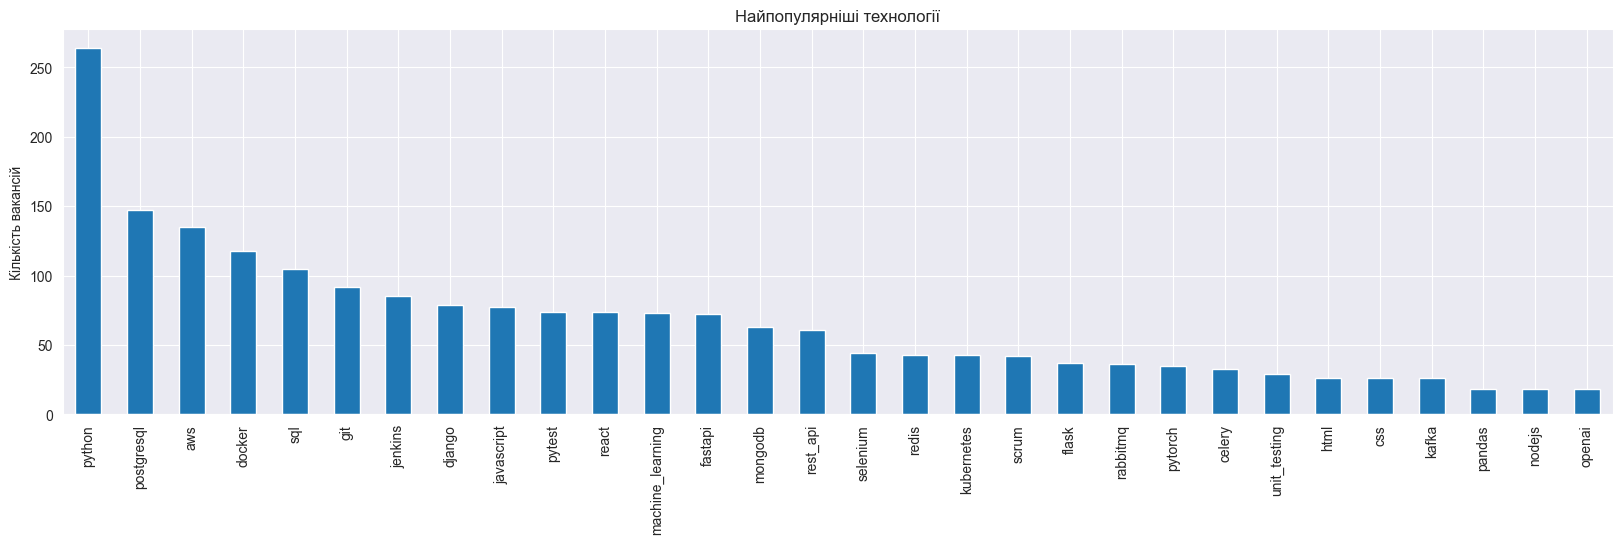

In [23]:
tech_counts.head(30).plot(kind="bar", figsize=(20, 5), title="Найпопулярніші технології")
plt.ylabel("Кількість вакансій")
plt.show()


What soft skills are the most common?

In [25]:
all_soft_skills = [skills for skills_list in technologies_df["soft_only"] for skills in skills_list]
soft_counts = pd.Series(all_soft_skills).value_counts()
print(soft_counts.dtype)

int64


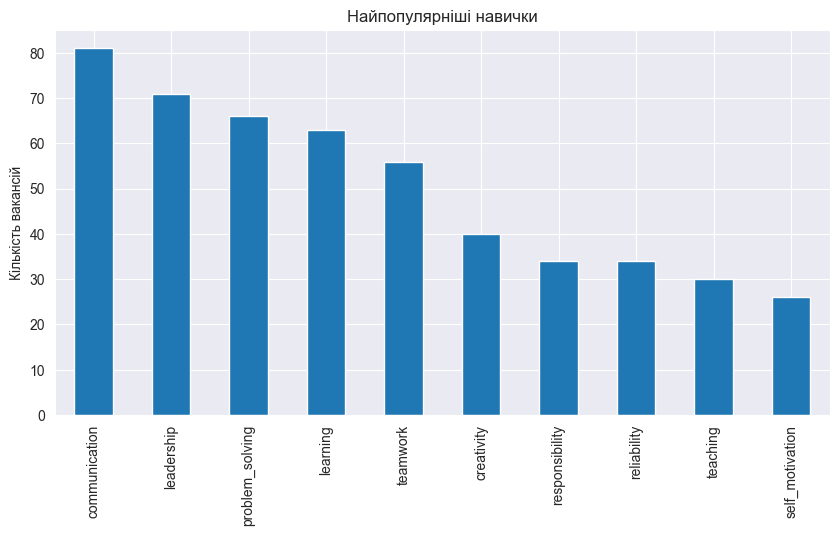

In [26]:
soft_counts.head(10).plot(kind="bar", figsize=(10, 5), title="Найпопулярніші навички")
plt.ylabel("Кількість вакансій")
plt.show()


The relationship between experience and technology. Group by experience categories (Junior (0–2), Middle (3–5), "Senior (6+).

In [29]:
technologies_df = technologies_df[technologies_df["experience"].notnull()]
technologies_df = technologies_df[technologies_df["tech_only"].notnull()]
technologies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 1 to 268
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        166 non-null    object 
 1   title       166 non-null    object 
 2   company     166 non-null    object 
 3   location    166 non-null    object 
 4   salary      40 non-null     object 
 5   experience  166 non-null    float64
 6   link        166 non-null    object 
 7   pars_tags   166 non-null    object 
 8   tech_only   166 non-null    object 
 9   soft_only   166 non-null    object 
dtypes: float64(1), object(9)
memory usage: 14.3+ KB


In [31]:
def categorize_exp(exp):
    if exp <= 2:
        return "Junior (0–2)"
    elif exp <= 5:
        return "Middle (3–5)"
    else:
        return "Senior (6+)"

technologies_df["experience_level"] = technologies_df["experience"].apply(categorize_exp)
technologies_df

,date,title,company,location,salary,experience,link,pars_tags,tech_only,soft_only,experience_level
1,19 травня 2025,Senior Python Engineer [Data oriented],YozmaTech,віддалено,NaN,5.0,https://jobs.dou.ua/companies/yozma-tech/vacan...,"{'technologies': ['aws', 'django', 'mongodb', ...","[aws, django, mongodb, postgresql, python, sql]","[adaptability, communication, creativity, lear...",Middle (3–5)
2,30 травня 2025,Middle/Senior Python Developer (Poland) (Jiji),Genesis,"Варшава (Польща), віддалено",NaN,3.0,https://jobs.dou.ua/companies/genesis-technolo...,"{'technologies': ['aws', 'flask', 'jenkins', '...","[aws, flask, jenkins, kafka, machine_learning,...","[learning, reliability]",Middle (3–5)
3,29 травня 2025,Python Team Lead,Infingame,за кордоном,NaN,1.0,https://jobs.dou.ua/companies/infingame/vacanc...,"{'technologies': ['aws', 'celery', 'docker', '...","[aws, celery, docker, fastapi, jenkins, kubern...","[communication, creativity, leadership, learning]",Junior (0–2)
4,20 травня 2025,Middle Python AI Engineer,WLTech.AI (WebLab Technology),віддалено,до $4000,1.0,https://jobs.dou.ua/companies/weblab-technolog...,"{'technologies': ['aws', 'fastapi', 'flask', '...","[aws, fastapi, flask, graphql, javascript, lar...","[creativity, learning, organization, reliability]",Junior (0–2)
6,14 травня 2025,Senior Back-end_Python Engineer,Softermii,віддалено,до $5500,5.0,https://jobs.dou.ua/companies/softermii/vacanc...,"{'technologies': ['aws', 'docker', 'git', 'jen...","[aws, docker, git, jenkins, kafka, kubernetes,...","[responsibility, teaching, teamwork]",Middle (3–5)
...,...,...,...,...,...,...,...,...,...,...,...
261,Вакансія від 28 травня 2025,"Інженер машинного навчання ML Python, військов...",12 ОЗСП ТрО ЗСУ,Дистанційна робота,$450-2800,2.0,https://www.work.ua/jobs/6695437/,"{'technologies': ['ai_ml', 'machine_learning',...","[ai_ml, machine_learning, python, pytorch]","[learning, organization, problem_solving, team...",Junior (0–2)
263,Вакансія від 2 червня 2025,Python Developer,PNN Soft,Київ,NaN,1.0,https://www.work.ua/jobs/5536195/,"{'technologies': ['aws', 'devops', 'docker', '...","[aws, devops, docker, git, javascript, mongodb...",[responsibility],Junior (0–2)
265,Вакансія від 3 червня 2025,Automation Engineer (Python),Zultys Inc.,Дистанційна робота,$1400-1600,2.0,https://www.work.ua/jobs/3671922/,"{'technologies': ['git', 'pytest', 'python', '...","[git, pytest, python, selenium, unit_testing]",[],Junior (0–2)
266,Вакансія від 24 травня 2025,Python developer,SalesBrush,Дистанційна робота,$300-400,1.0,https://www.work.ua/jobs/5664829/,"{'technologies': ['flask', 'javascript', 'post...","[flask, javascript, postgresql, python, sql]",[],Junior (0–2)


Grouping by level.

In [63]:
expierens_level_counts = (
    technologies_df
    .explode("tech_only")
    .groupby("experience_level")["tech_only"]
    .value_counts()
    .sort_values(ascending=False)
)
expierens_level_counts

experience_level  tech_only 
Middle (3–5)      python        75
Junior (0–2)      python        74
Middle (3–5)      aws           50
                  postgresql    47
Junior (0–2)      postgresql    43
                                ..
Senior (6+)       nodejs         1
                  pandas         1
                  pytest         1
                  rabbitmq       1
                  sqlite         1
Name: count, Length: 113, dtype: int64

Let's build three separate bar charts for Junior, Middle, and Senior developers

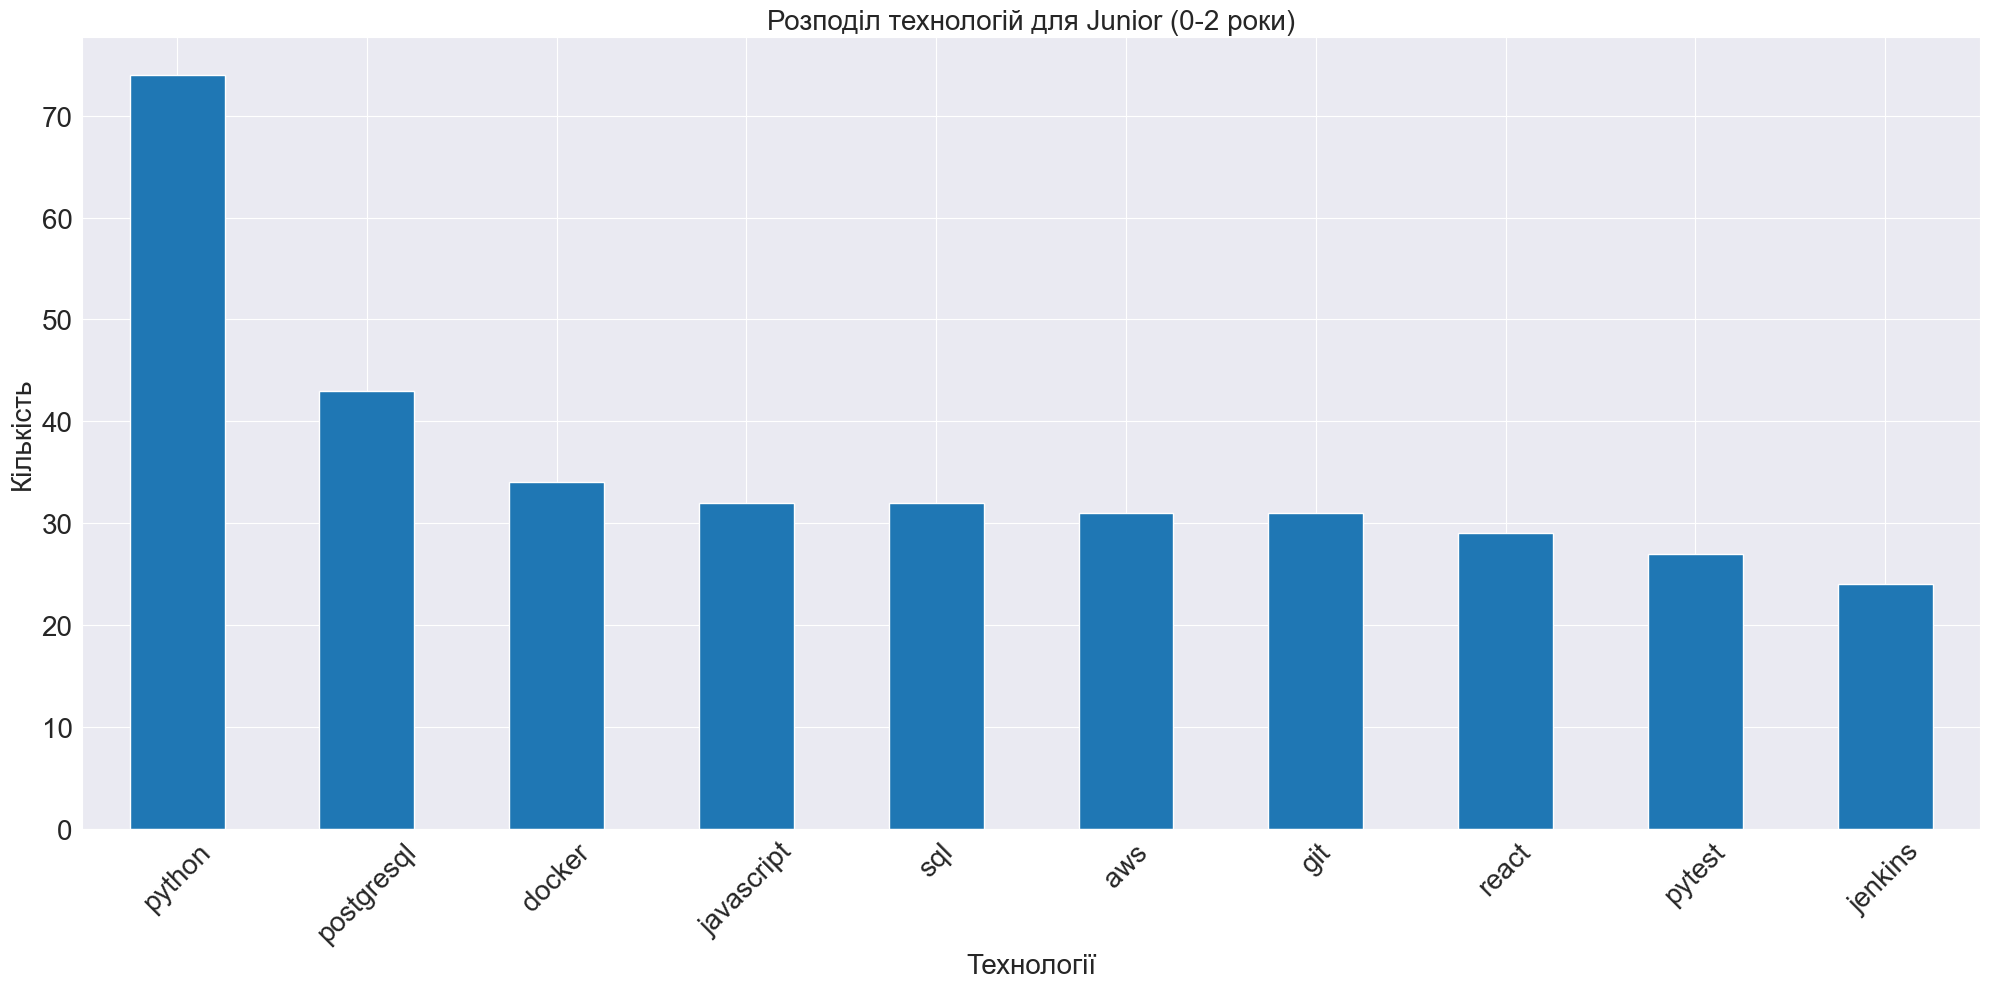

In [66]:
fig, ax1 = plt.subplots(figsize=(20, 10))

junior_data = expierens_level_counts.loc["Junior (0–2)"].nlargest(10)

junior_data.plot(kind='bar', ax=ax1)
ax1.set_title("Розподіл технологій для Junior (0-2 роки)", fontsize=20)
ax1.set_xlabel("Технології", fontsize=20)
ax1.set_ylabel('Кількість', fontsize=20)

ax1.tick_params(axis="both", labelsize=20)
ax1.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()



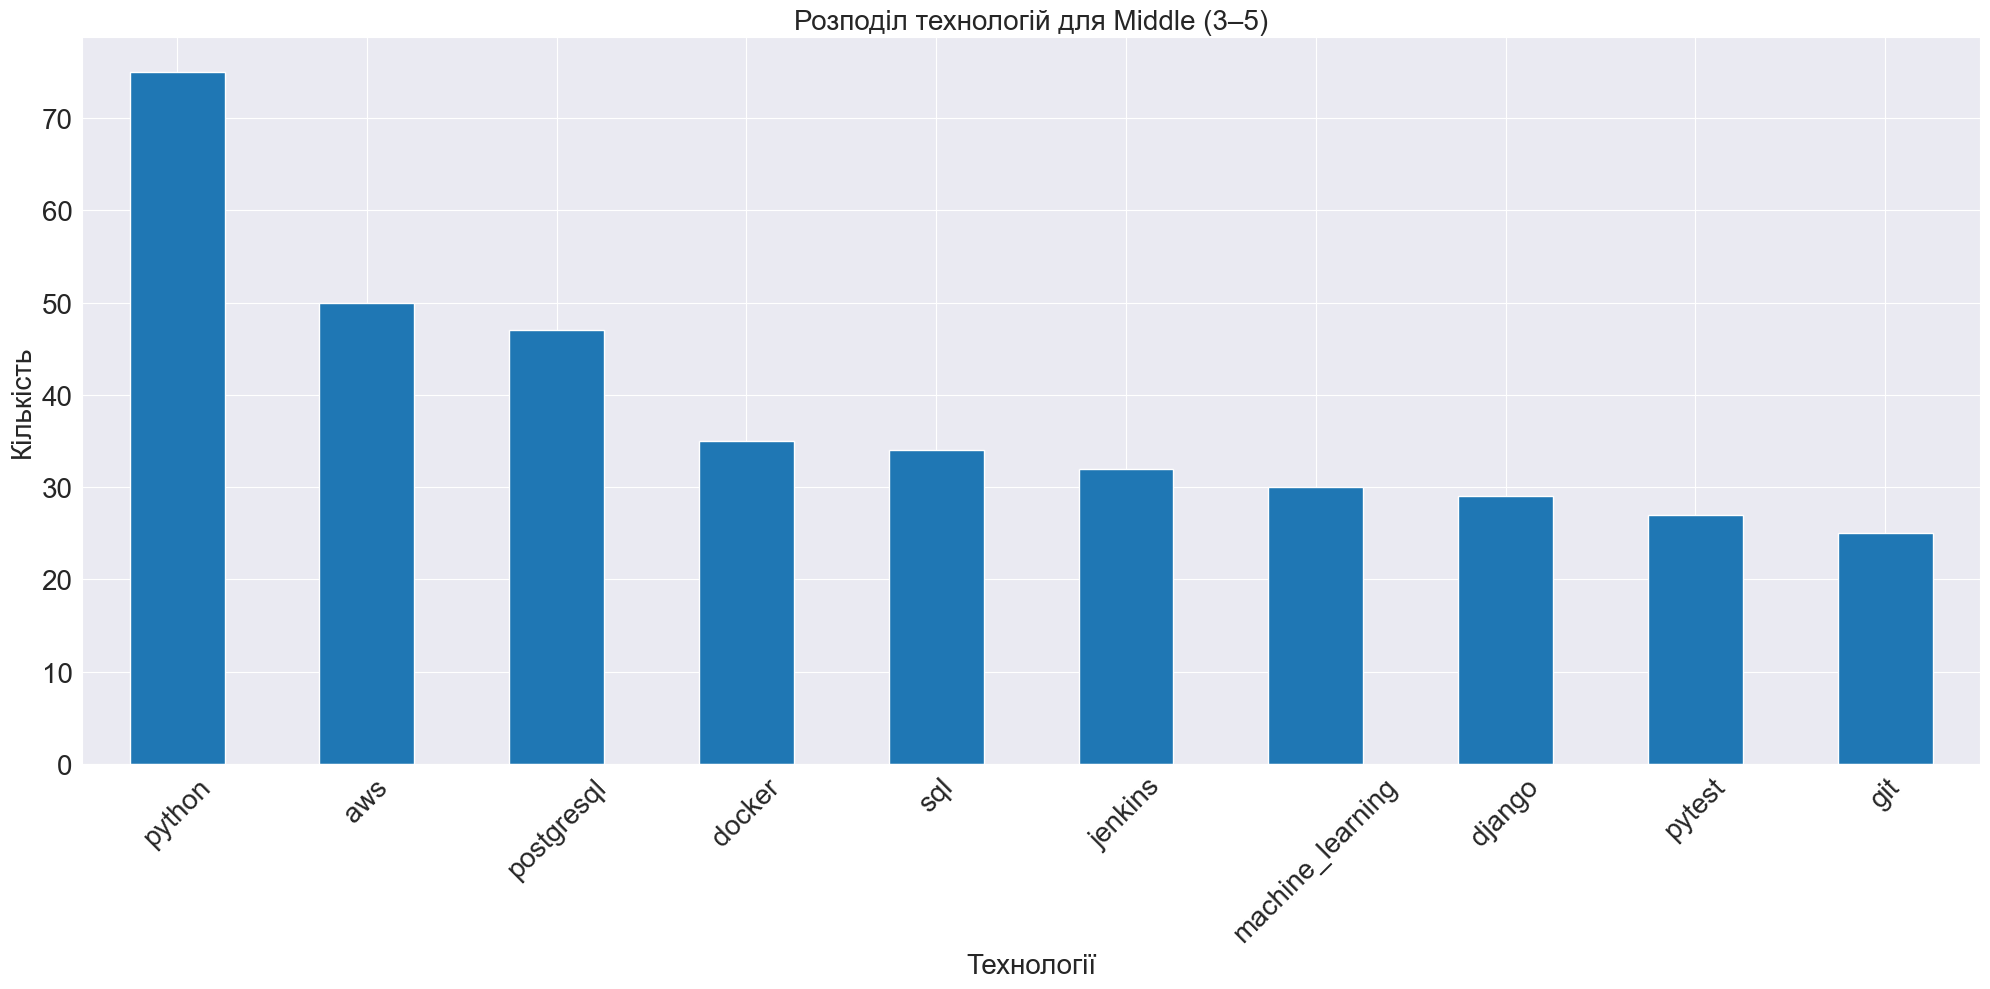

In [69]:
fig, ax1 = plt.subplots(figsize=(20, 10))

junior_data = expierens_level_counts.loc["Middle (3–5)"].nlargest(10)

junior_data.plot(kind='bar', ax=ax1)
ax1.set_title("Розподіл технологій для Middle (3–5)", fontsize=20)
ax1.set_xlabel("Технології", fontsize=20)
ax1.set_ylabel("Кількість", fontsize=20)

ax1.tick_params(axis="both", labelsize=20)
ax1.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

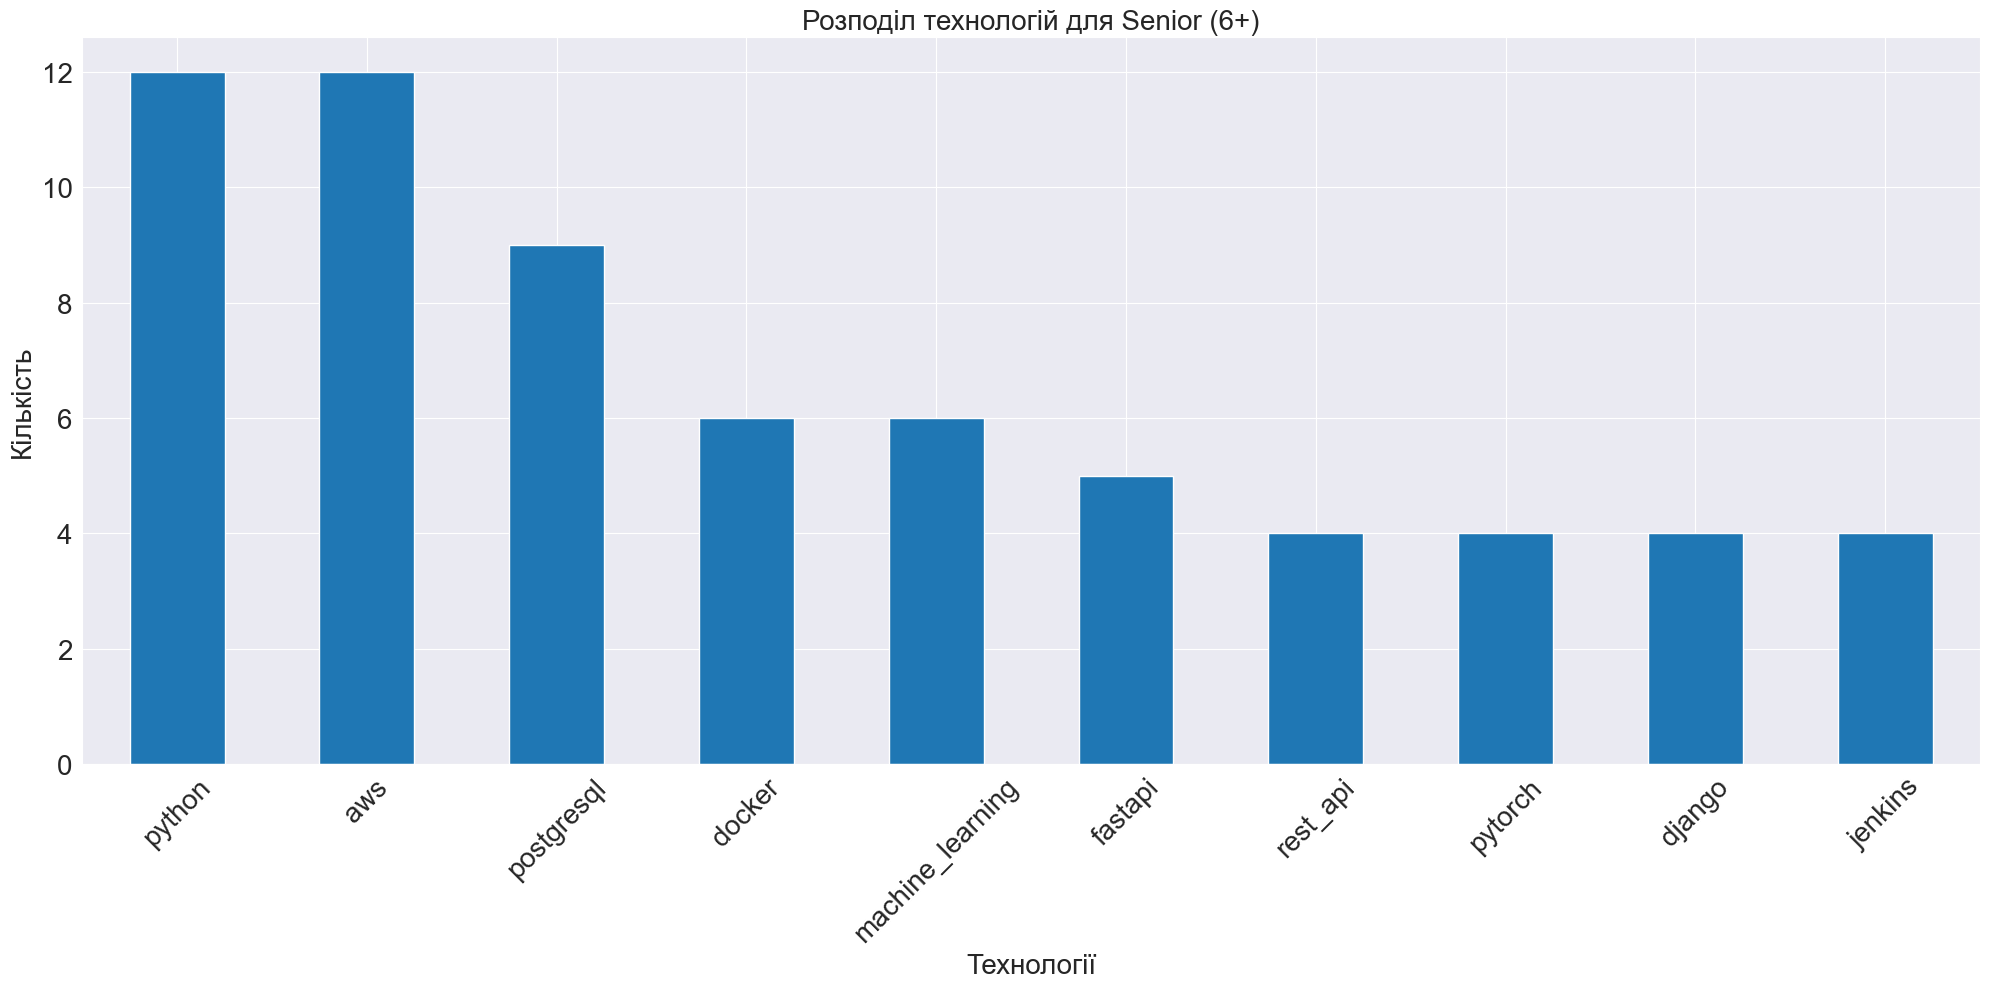

In [70]:
fig, ax1 = plt.subplots(figsize=(20, 10))

junior_data = expierens_level_counts.loc["Senior (6+)"].nlargest(10)

junior_data.plot(kind='bar', ax=ax1)
ax1.set_title("Розподіл технологій для Senior (6+)", fontsize=20)
ax1.set_xlabel("Технології", fontsize=20)
ax1.set_ylabel("Кількість", fontsize=20)

ax1.tick_params(axis="both", labelsize=20)
ax1.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [74]:
expierence_distribution = (
    technologies_df["experience_level"]
    .value_counts(normalize=True) * 100
).round(2)

print(expierence_distribution)

experience_level
Middle (3–5)    46.39
Junior (0–2)    46.39
Senior (6+)      7.23
Name: proportion, dtype: float64
